United States COVID-19 Data (up to may 17, 2020)

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
df = pd.read_csv('COVID-19 Activity.csv')
df.describe()

,COUNTY_FIPS_NUMBER,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT,PEOPLE_DEATH_NEW_COUNT
count,343380.000000,377690.000000,377690.000000,377690.000000,377690.000000
mean,30280.302749,381.924573,12.570677,25.494683,0.839863
std,15254.517643,5603.219446,182.802527,579.928655,17.649299
min,1001.000000,0.000000,-2461.000000,0.000000,-1170.000000
25%,18131.000000,0.000000,0.000000,0.000000,0.000000
50%,29098.000000,0.000000,0.000000,0.000000,0.000000
75%,45069.000000,11.000000,0.000000,0.000000,0.000000
max,56043.000000,290678.000000,15305.000000,34796.000000,2004.000000


In [168]:
df.head(10)

,REPORT_DATE,DATA_SOURCE_NAME,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_3_CODE,COUNTRY_ALPHA_2_CODE,CONTINENT_NAME,PROVINCE_STATE_NAME,COUNTY_NAME,COUNTY_FIPS_NUMBER,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT,PEOPLE_DEATH_NEW_COUNT
0,2/16/2020,New York Times,United States,USA,US,America,Oklahoma,Washita,40149.0,0,0,0,0
1,4/27/2020,New York Times,United States,USA,US,America,Oklahoma,Washita,40149.0,0,0,0,0
2,4/13/2020,New York Times,United States,USA,US,America,Oklahoma,Washita,40149.0,0,0,0,0
3,3/16/2020,New York Times,United States,USA,US,America,Oklahoma,Washita,40149.0,0,0,0,0
4,4/24/2020,New York Times,United States,USA,US,America,Oklahoma,Washita,40149.0,0,0,0,0
5,5/5/2020,New York Times,United States,USA,US,America,Oklahoma,Washita,40149.0,0,0,0,0
6,2/6/2020,New York Times,United States,USA,US,America,Oklahoma,Washita,40149.0,0,0,0,0
7,5/12/2020,New York Times,United States,USA,US,America,Oklahoma,Washita,40149.0,0,0,0,0
8,3/15/2020,New York Times,United States,USA,US,America,Oklahoma,Washita,40149.0,0,0,0,0
9,5/3/2020,New York Times,United States,USA,US,America,Oklahoma,Washita,40149.0,0,0,0,0


In [169]:
df = df.drop(columns=['DATA_SOURCE_NAME', 'COUNTRY_SHORT_NAME', 'COUNTRY_ALPHA_3_CODE', 'CONTINENT_NAME'])

In [170]:
df.head(10)

,REPORT_DATE,COUNTRY_ALPHA_2_CODE,PROVINCE_STATE_NAME,COUNTY_NAME,COUNTY_FIPS_NUMBER,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT,PEOPLE_DEATH_NEW_COUNT
0,2/16/2020,US,Oklahoma,Washita,40149.0,0,0,0,0
1,4/27/2020,US,Oklahoma,Washita,40149.0,0,0,0,0
2,4/13/2020,US,Oklahoma,Washita,40149.0,0,0,0,0
3,3/16/2020,US,Oklahoma,Washita,40149.0,0,0,0,0
4,4/24/2020,US,Oklahoma,Washita,40149.0,0,0,0,0
5,5/5/2020,US,Oklahoma,Washita,40149.0,0,0,0,0
6,2/6/2020,US,Oklahoma,Washita,40149.0,0,0,0,0
7,5/12/2020,US,Oklahoma,Washita,40149.0,0,0,0,0
8,3/15/2020,US,Oklahoma,Washita,40149.0,0,0,0,0
9,5/3/2020,US,Oklahoma,Washita,40149.0,0,0,0,0


In [171]:
new_col_names = {'REPORT_DATE': 'date','COUNTRY_ALPHA_2_CODE': 'country', 'PROVINCE_STATE_NAME': 'state', 'COUNTY_NAME': 'county',
                'COUNTY_FIPS_NUMBER': 'FIPS','PEOPLE_POSITIVE_CASES_COUNT': 'total_cases', 
                'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'new_cases','PEOPLE_DEATH_COUNT': 'death_count', 
                'PEOPLE_DEATH_NEW_COUNT': 'new_deaths'}
df = df.rename(columns=new_col_names)
df['date'] = pd.to_datetime(df['date']).dt.date
df = df[df['country'] == 'US']

In [172]:
df.head(10)

,date,country,state,county,FIPS,total_cases,new_cases,death_count,new_deaths
0,2020-02-16,US,Oklahoma,Washita,40149.0,0,0,0,0
1,2020-04-27,US,Oklahoma,Washita,40149.0,0,0,0,0
2,2020-04-13,US,Oklahoma,Washita,40149.0,0,0,0,0
3,2020-03-16,US,Oklahoma,Washita,40149.0,0,0,0,0
4,2020-04-24,US,Oklahoma,Washita,40149.0,0,0,0,0
5,2020-05-05,US,Oklahoma,Washita,40149.0,0,0,0,0
6,2020-02-06,US,Oklahoma,Washita,40149.0,0,0,0,0
7,2020-05-12,US,Oklahoma,Washita,40149.0,0,0,0,0
8,2020-03-15,US,Oklahoma,Washita,40149.0,0,0,0,0
9,2020-05-03,US,Oklahoma,Washita,40149.0,0,0,0,0


In [173]:
# Find num of deaths per state
states = df.groupby('state').sum()
state_deaths = states['new_deaths'].sort_values(ascending=False)
total_deaths = state_deaths.sum()

In [174]:
print('Total Deaths:', total_deaths)

Total Deaths: 89367


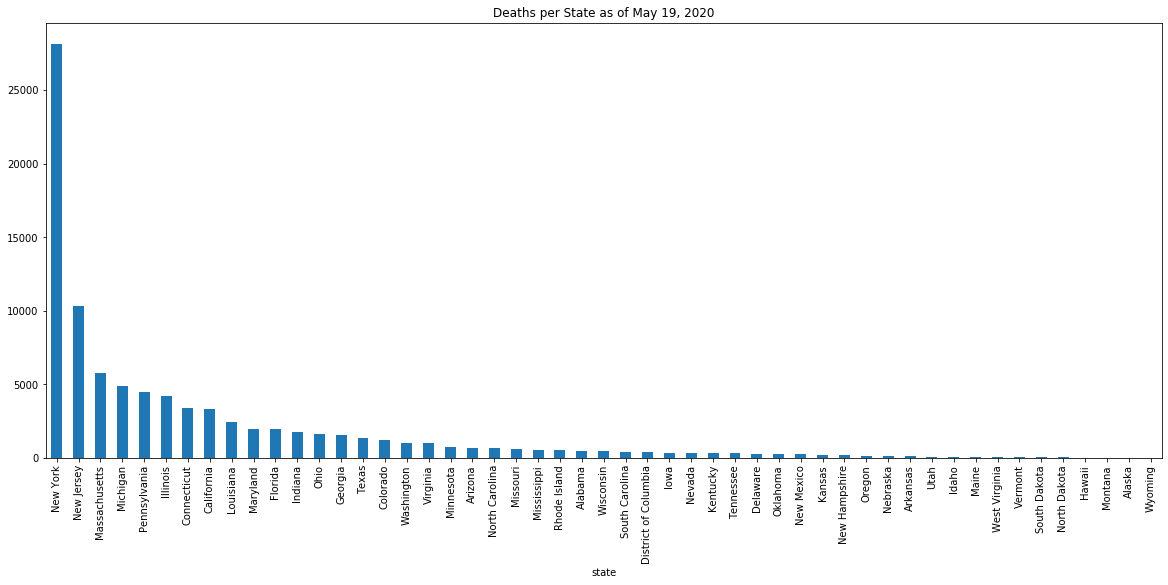

In [175]:
state_deaths.plot(kind='bar', figsize=(20,8))
plt.title('Deaths per State as of May 19, 2020')
plt.show()

In [176]:
# Find cases and deaths per day
by_day = df[['date', 'total_cases', 'new_cases', 'death_count', 'new_deaths']]
grouped_by_date = by_day.groupby('date')[['new_cases', 'new_deaths']].sum().reset_index()

cases_per_day = grouped_by_date['new_cases']
deaths_per_day = grouped_by_date['new_deaths']
dates = grouped_by_date['date']

# Add deaths per day to get total per day over time
total_deaths_on_date = {}
total_deaths = 0
for day, death in zip(dates, deaths_per_day):
    total_deaths += death
    total_deaths_on_date[day] = total_deaths

# Add cases per day to get total per day over time
total_cases_on_date = {}
total_cases = 0
for day, case in zip(dates, cases_per_day):
    total_cases += case
    total_cases_on_date[day] = total_cases
        
        
total_deaths_series = pd.Series(total_deaths_on_date).reset_index()
total_cases_series = pd.Series(total_cases_on_date).reset_index()


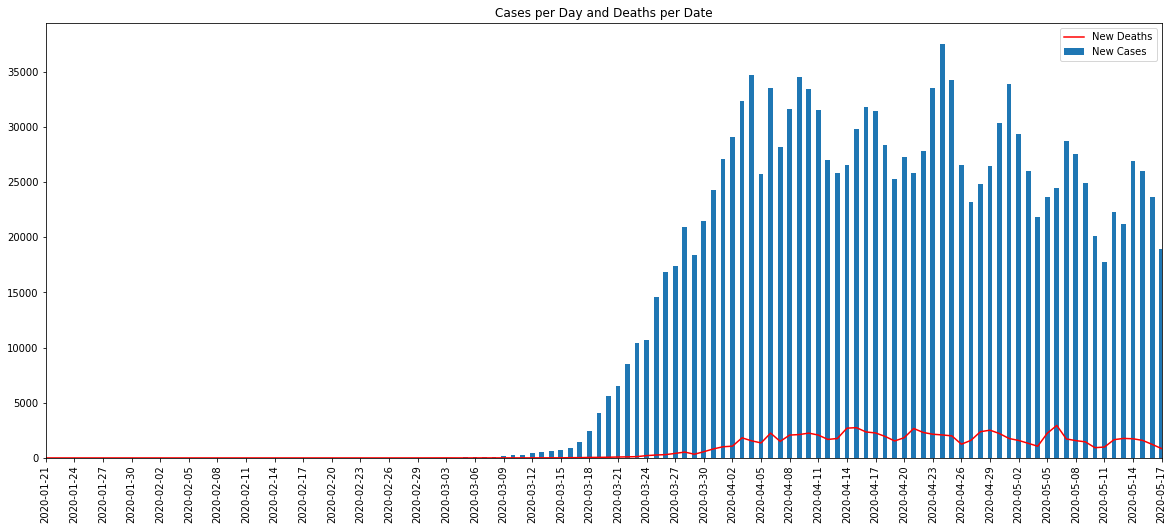

In [177]:
# Plot num of new cases per day with num of new deaths per day
ax = cases_per_day.plot(kind='bar', figsize=(20,8))
deaths_per_day.plot(kind='line', ax=ax, color='red')
ax.set_xticks(range(len(dates))[0::3])
ax.set_xticklabels(dates[0::3], rotation=90)
ax.set_title('Cases per Day and Deaths per Date')
ax.legend(['New Deaths', 'New Cases'])
plt.show()

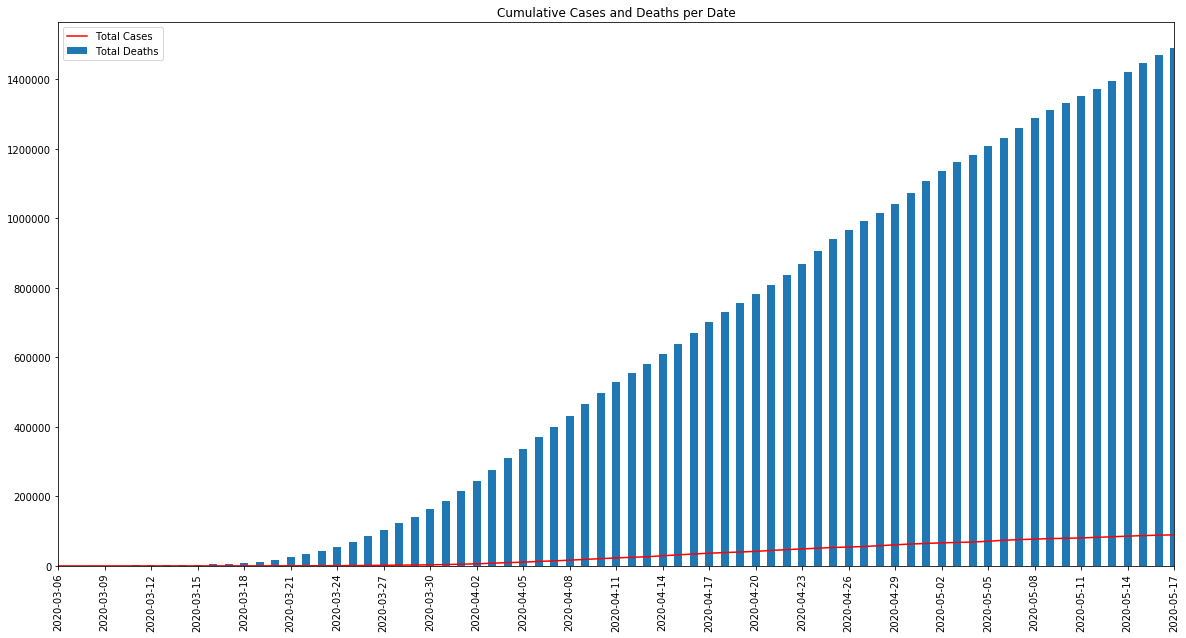

In [178]:
# Plot cumulative cases and deaths over time
total_deaths_series
total_cases_series
ax = total_cases_series.plot(kind='bar', figsize=(20,10))
total_deaths_series.plot(kind='line', ax=ax, color='red')
ax.set_xticks(range(len(dates))[0::3])
ax.set_xticklabels(dates[0::3], rotation=90)
ax.set_xlim(45)
ax.set_title('Cumulative Cases and Deaths per Date')
ax.legend(['Total Cases', 'Total Deaths'])
plt.show()

In [182]:
# Deaths per State???
state_df = df.groupby(['date', 'state'])['total_cases', 'death_count'].sum()
cases_per_state = state_df['total_cases'].reset_index()
deaths_per_state = state_df['death_count'].reset_index()
states = cases_per_state['state']
deaths = deaths_per_state['death_count']

list_deaths_per_state = {}
for state, death in zip(states, deaths):
    if state not in list_deaths_per_state:
        list_deaths_per_state[state] = [death]
    else:
        list_deaths_per_state[state].append(death)

In [180]:
# Plot Deaths per State
state_deaths_df = pd.DataFrame(list_deaths_per_state, index = pd.date_range(
                                start='2020/01/21', end='2020/05/17'))
over_1500_deaths = state_deaths_df[state_deaths_df.columns[state_deaths_df.iloc[-1,:] > 1500]]
other_states = state_deaths_df[state_deaths_df.columns[state_deaths_df.iloc[-1,:] <= 1500]].iloc[-1].sum()


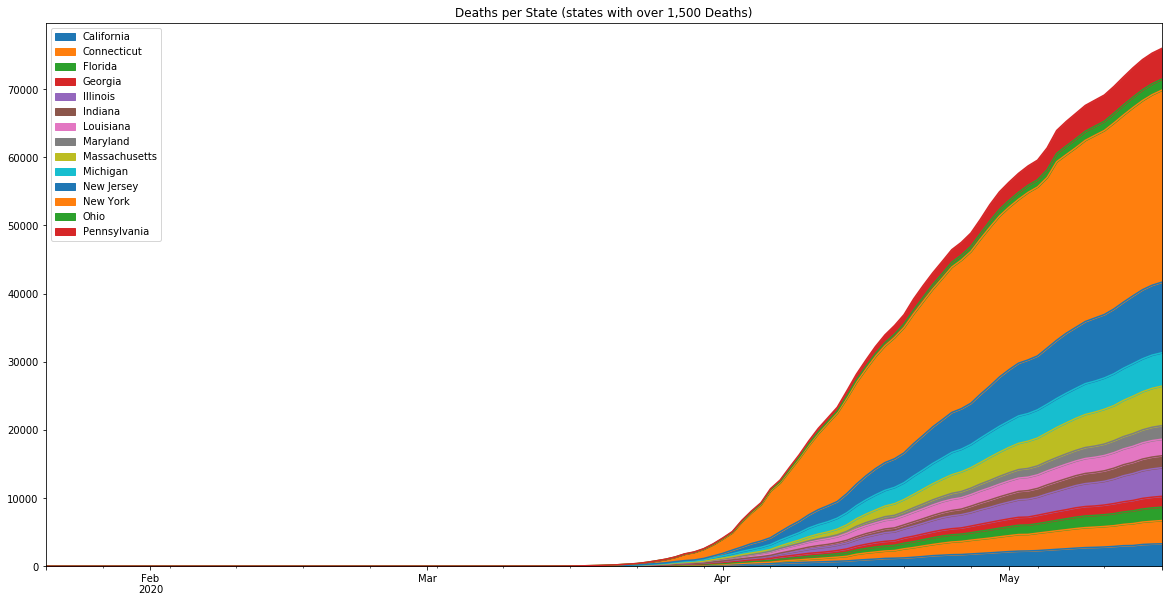

In [181]:
ax = over_1500_deaths.plot.area(figsize=(20,10))
ax.set_title('Deaths per State (states with over 1,500 Deaths)')
plt.show()